Download the dataset from the link below:
    https://www.kaggle.com/rakannimer/air-passenger-prediction

#### Importing the libraries

In [1]:
#import numpy 
import numpy as np
#import pandas
import pandas as pd
#import visualization library
import matplotlib.pyplot as plt

#### importing the dataset

In [2]:
#read the dataset
data=pd.read_csv(r'E:\Forecast-commuters-inflow-for-Airline-Industry-using-Prophet-main\forecast commuters\Dataset\air_passengers.csv')

In [3]:
#check the first 5 rows of data
data.head()

,ds,y
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [4]:
#checking the shape of data
data.shape

(144, 2)

#### Taking care of Missing data

In [5]:
#checking the null values
data.isnull().any()

ds    False
y     False
dtype: bool

In [6]:
#rename the #passengers column name
data.rename(columns={"#Passengers": "Passengers"},inplace=True)

In [7]:
data.head()

,ds,y
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


#### Data Visualization

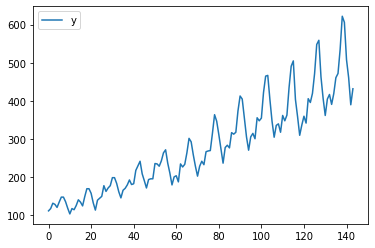

In [8]:
#We can plot the data easily in Pandas by calling the plot() function on the DataFrame.
import matplotlib.pyplot as plt
data.plot()
plt.show()

In [9]:
data['Month']=pd.to_datetime(data['ds'], format='%Y-%m')

In [10]:
data.head()

,ds,y,Month
0,1949-01,112,1949-01-01
1,1949-02,118,1949-02-01
2,1949-03,132,1949-03-01
3,1949-04,129,1949-04-01
4,1949-05,121,1949-05-01


In [11]:
data.shape

(144, 3)

#### Forecast airline passengers traffic flow With Prophet

In [12]:
#import datetime conversion
from pandas import to_datetime
#prepare expected column names
data.columns = ['ds', 'y','Month']
data['ds']= to_datetime(data['ds'])

In [13]:
data.head()

,ds,y,Month
0,1949-01-01,112,1949-01-01
1,1949-02-01,118,1949-02-01
2,1949-03-01,132,1949-03-01
3,1949-04-01,129,1949-04-01
4,1949-05-01,121,1949-05-01


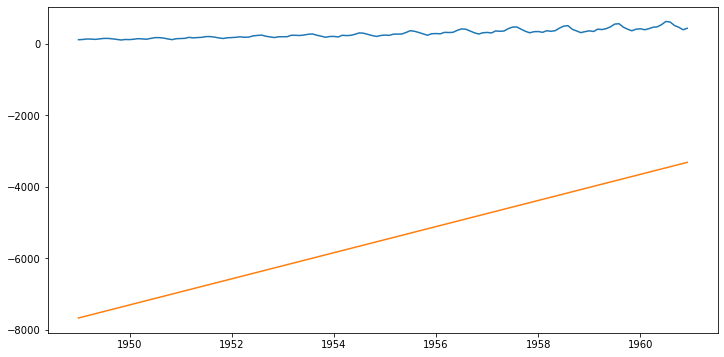

In [14]:
#visualizing the ds column
#configure the figure size
plt.figure(figsize=(12,6))
plt.plot(data.set_index(['ds']))

#### Model Building

In [15]:
#fit prophet model on the dataset

#import Prophet library from fbprophet
from fbprophet import Prophet
# define the model
model = Prophet()
# fit the model
model.fit(data)

Importing plotly failed. Interactive plots will not work.
INFO:numexpr.utils:NumExpr defaulting to 4 threads.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


#### Prediction

In [16]:
future_prediction = model.make_future_dataframe(periods=365,freq="D")
future_prediction.tail()

,ds
504,1961-11-27
505,1961-11-28
506,1961-11-29
507,1961-11-30
508,1961-12-01


#### Obtaining the forecastes

In [17]:
forecast=model.predict(future_prediction)

In [18]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1949-01-01,107.263357,54.557644,116.085581,107.263357,107.263357,-21.452776,-21.452776,-21.452776,-21.452776,-21.452776,-21.452776,0.0,0.0,0.0,85.810581
1,1949-02-01,109.412472,50.880360,109.039505,109.412472,109.412472,-30.139244,-30.139244,-30.139244,-30.139244,-30.139244,-30.139244,0.0,0.0,0.0,79.273228
2,1949-03-01,111.353607,81.571109,138.892105,111.353607,111.353607,-0.501517,-0.501517,-0.501517,-0.501517,-0.501517,-0.501517,0.0,0.0,0.0,110.852090
3,1949-04-01,113.502722,78.123331,138.035031,113.502722,113.502722,-4.911819,-4.911819,-4.911819,-4.911819,-4.911819,-4.911819,0.0,0.0,0.0,108.590903
4,1949-05-01,115.582510,81.716263,142.481514,115.582510,115.582510,-3.589511,-3.589511,-3.589511,-3.589511,-3.589511,-3.589511,0.0,0.0,0.0,111.992998


#### summarize the forecast

In [19]:
# summarize the forecast
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())

          ds        yhat  yhat_lower  yhat_upper
0 1949-01-01   85.810581   54.557644  116.085581
1 1949-02-01   79.273228   50.880360  109.039505
2 1949-03-01  110.852090   81.571109  138.892105
3 1949-04-01  108.590903   78.123331  138.035031
4 1949-05-01  111.992998   81.716263  142.481514


#### plot forecast

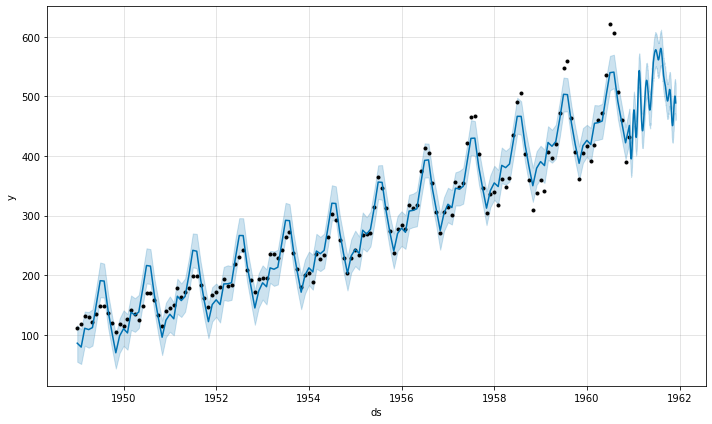

In [20]:
model.plot(forecast)
plt.show()

#### plotting the forecast components

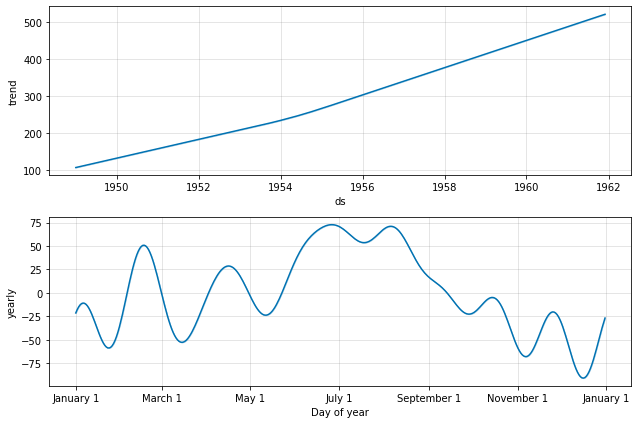

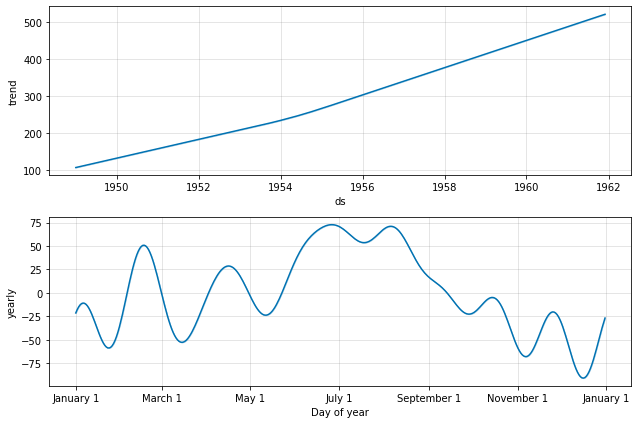

In [21]:
model.plot_components(forecast)

#### Cross Validation

In [22]:
from fbprophet.diagnostics import cross_validation

In [23]:
cv = cross_validation(model,initial = '530 days',period='180 days',horizon = '365 days')
cv

INFO:fbprophet:Making 20 forecasts with cutoffs between 1950-07-22 00:00:00 and 1959-12-02 00:00:00


INFO:fbprophet:n_changepoints greater than number of observations. Using 14.
INFO:fbprophet:n_changepoints greater than number of observations. Using 19.
INFO:fbprophet:n_changepoints greater than number of observations. Using 23.


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,1950-08-01,157.440209,157.160365,157.674256,170,1950-07-22
1,1950-09-01,123.658202,122.626476,124.687980,158,1950-07-22
2,1950-10-01,133.066813,131.194463,135.199089,133,1950-07-22
3,1950-11-01,126.524836,123.489865,129.865649,114,1950-07-22
4,1950-12-01,131.499050,127.161354,136.251712,140,1950-07-22
...,...,...,...,...,...,...
235,1960-08-01,527.467888,502.185912,552.977157,606,1959-12-02
236,1960-09-01,486.233672,460.587755,513.726190,508,1959-12-02
237,1960-10-01,452.566015,427.822866,478.504290,461,1959-12-02
238,1960-11-01,422.734640,397.066080,448.377074,390,1959-12-02


#### Evaluation of Model

In [24]:
from fbprophet.diagnostics import performance_metrics
pm=performance_metrics(cv)
pm.head()

,horizon,mse,rmse,mae,mape,mdape,coverage
0,41 days,1048.094128,32.374282,25.673945,0.084241,0.078882,0.208333
1,42 days,980.365010,31.310781,25.104226,0.082844,0.078882,0.166667
2,46 days,1034.632779,32.165708,26.666074,0.088054,0.085691,0.125000
3,47 days,1001.770283,31.650755,26.380638,0.086731,0.085691,0.125000
4,48 days,999.430056,31.613764,26.143152,0.085020,0.085691,0.166667


#### Visualizing the performance Metrics

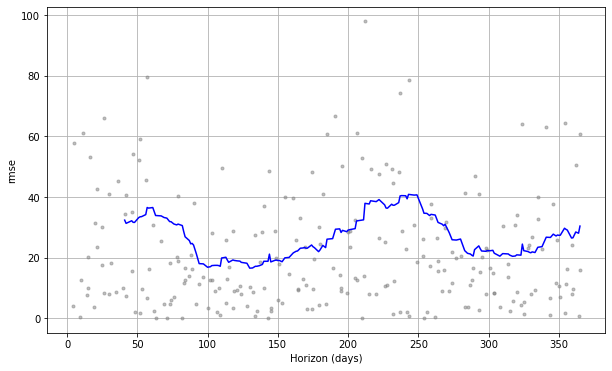

In [25]:
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(cv,metric='rmse')

#### Save the Model

In [26]:
#import pickle
import pickle
pickle.dump(model,open('airpassengers.pkl','wb'))